<a href="https://colab.research.google.com/github/zahranicp/hands-on-ML2/blob/main/chapter05/05_support_vector_machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# Step 2: Load dan persiapkan data
iris_data = load_iris()
X_train = iris_data.data[:, [2, 3]]  # Petal length dan petal width
y_train = (iris_data.target == 2).astype(float)  # Binary: 1 jika Virginica

# Step 3: Buat pipeline model SVM Linear
linear_svm_pipeline = make_pipeline(
    StandardScaler(),
    LinearSVC(C=1.0, loss="hinge", random_state=42)
)

# Step 4: Latih model
linear_svm_pipeline.fit(X_train, y_train)

# Step 5: Prediksi
sample_data = np.array([[5.5, 1.7]])
prediction = linear_svm_pipeline.predict(sample_data)

print("Prediction untuk data", sample_data, "=>", "Virginica" if prediction[0] == 1.0 else "Bukan Virginica")


Prediction untuk data [[5.5 1.7]] => Virginica


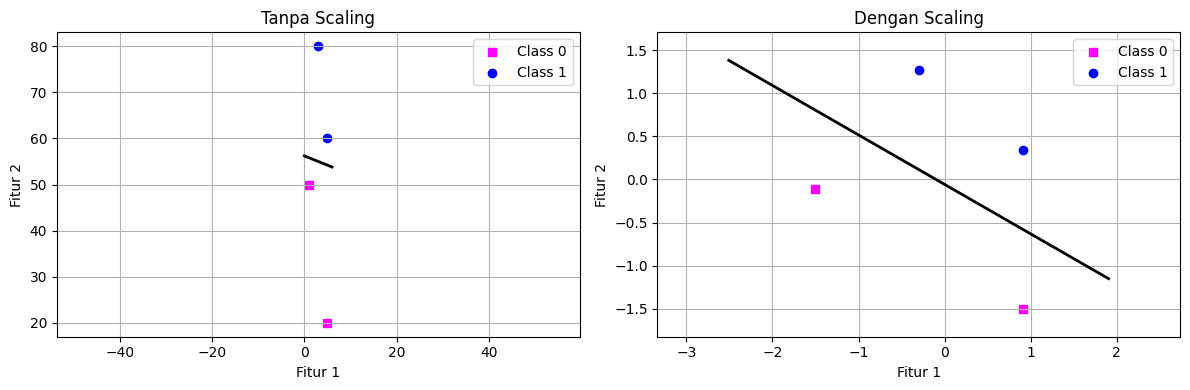

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Step 1: Buat dataset mainan
data_sample = np.array([[1, 50], [5, 20], [3, 80], [5, 60]], dtype=np.float64)
label_sample = np.array([0, 0, 1, 1])

# Step 2: Model tanpa scaling
svm_no_scale = SVC(kernel="linear", C=100)
svm_no_scale.fit(data_sample, label_sample)

# Step 3: Scaling fitur
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_sample)

# Step 4: Model dengan data yang telah distandardisasi
svm_scaled = SVC(kernel="linear", C=100)
svm_scaled.fit(data_scaled, label_sample)

# Step 5: Visualisasi
def draw_svm_boundary(model, X, y, title, ax, scaled=False):
    def boundary_line(clf, xmin, xmax):
        w = clf.coef_[0]
        b = clf.intercept_[0]
        x = np.linspace(xmin, xmax, 100)
        y = -(w[0]/w[1]) * x - b/w[1]
        return x, y

    ax.set_title(title)
    ax.scatter(X[:, 0][y==0], X[:, 1][y==0], c="magenta", marker="s", label="Class 0")
    ax.scatter(X[:, 0][y==1], X[:, 1][y==1], c="blue", marker="o", label="Class 1")
    x_vals, y_vals = boundary_line(model, X[:, 0].min()-1, X[:, 0].max()+1)
    ax.plot(x_vals, y_vals, "k-", linewidth=2)
    ax.grid(True)
    ax.legend()
    ax.set_xlabel("Fitur 1")
    ax.set_ylabel("Fitur 2")
    ax.axis('equal')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
draw_svm_boundary(svm_no_scale, data_sample, label_sample, "Tanpa Scaling", ax1)
draw_svm_boundary(svm_scaled, data_scaled, label_sample, "Dengan Scaling", ax2)
plt.tight_layout()
plt.show()


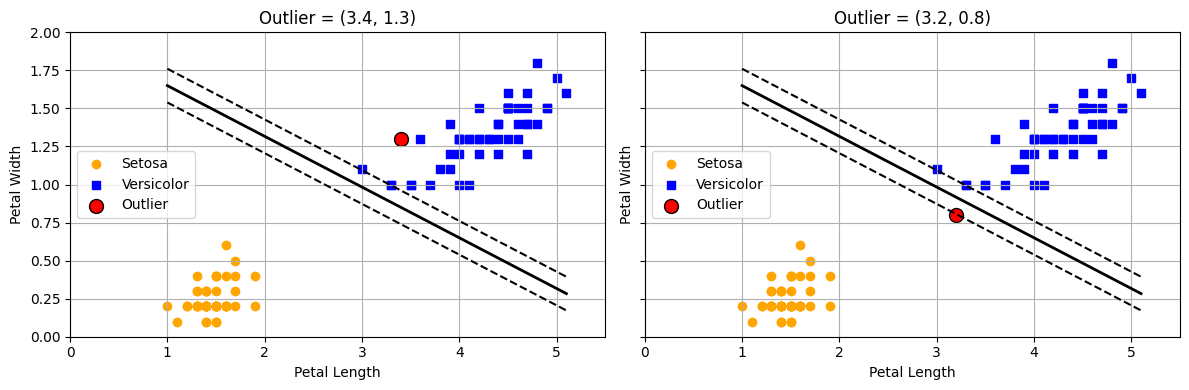

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC

# Step 1: Ambil dua kelas dari Iris
iris = load_iris()
X_full = iris.data[:, [2, 3]]
y_full = iris.target

# Fokus ke kelas 0 dan 1 (binary)
mask = (y_full == 0) | (y_full == 1)
X = X_full[mask]
y = y_full[mask]

# Step 2: Tambahkan outlier
outlier_1 = np.array([[3.4, 1.3]])
outlier_2 = np.array([[3.2, 0.8]])

X_hard = np.vstack([X, outlier_1])
y_hard = np.append(y, 0)

X_soft = np.vstack([X, outlier_2])
y_soft = np.append(y, 0)

# Step 3: Model dengan hard margin (C sangat besar)
clf_hard = SVC(kernel="linear", C=1e10)
clf_hard.fit(X_soft, y_soft)

# Step 4: Visualisasi
def plot_decision_boundary(model, X, y, ax, title, highlight_idx=None):
    ax.scatter(X[:, 0][y==0], X[:, 1][y==0], c="orange", marker="o", label="Setosa")
    ax.scatter(X[:, 0][y==1], X[:, 1][y==1], c="blue", marker="s", label="Versicolor")
    if highlight_idx is not None:
        ax.scatter(X[highlight_idx, 0], X[highlight_idx, 1], c="red", s=100, label="Outlier", edgecolors='k')

    # Plot decision boundary
    w = model.coef_[0]
    b = model.intercept_[0]
    x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 200)
    y_vals = -(w[0]/w[1]) * x_vals - b/w[1]
    margin = 1 / np.linalg.norm(w)
    y_upper = y_vals + margin
    y_lower = y_vals - margin

    ax.plot(x_vals, y_vals, "k-", linewidth=2)
    ax.plot(x_vals, y_upper, "k--")
    ax.plot(x_vals, y_lower, "k--")

    ax.set_title(title)
    ax.set_xlabel("Petal Length")
    ax.set_ylabel("Petal Width")
    ax.legend()
    ax.axis([0, 5.5, 0, 2])
    ax.grid(True)

# Step 5: Plot kedua kasus
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

plot_decision_boundary(clf_hard, X_hard, y_hard, ax1, "Outlier = (3.4, 1.3)", highlight_idx=-1)
plot_decision_boundary(clf_hard, X_soft, y_soft, ax2, "Outlier = (3.2, 0.8)", highlight_idx=-1)

plt.tight_layout()
plt.show()


In [11]:
from sklearn.datasets import load_iris

# Load iris & fokus ke binary classification (Virginica vs lainnya)
iris = load_iris()
X = iris.data[:, [2, 3]]
y = (iris.target == 2).astype(float)


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

# Model dengan regularisasi ringan (C kecil → lebih fleksibel)
svm_soft = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", LinearSVC(C=1, loss="hinge", random_state=42))
])

# Model dengan regularisasi ketat (C besar → lebih kaku)
svm_hard = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", LinearSVC(C=100, loss="hinge", random_state=42))
])


In [13]:
# Latih kedua model
svm_soft.fit(X, y)
svm_hard.fit(X, y)


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', LinearSVC(C=100, loss='hinge', random_state=42))])

In [14]:
# Ambil scaler dan model dari pipeline
scaler = svm_soft.named_steps["scaler"]
clf_soft = svm_soft.named_steps["svm"]
clf_hard = svm_hard.named_steps["svm"]

# Konversi parameter ke skala asli (karena sebelumnya distandardisasi)
b_soft = clf_soft.decision_function([-scaler.mean_ / scaler.scale_])
b_hard = clf_hard.decision_function([-scaler.mean_ / scaler.scale_])
w_soft = clf_soft.coef_[0] / scaler.scale_
w_hard = clf_hard.coef_[0] / scaler.scale_

# Update parameter supaya bisa digunakan untuk plotting
clf_soft.coef_ = np.array([w_soft])
clf_soft.intercept_ = np.array([b_soft])
clf_hard.coef_ = np.array([w_hard])
clf_hard.intercept_ = np.array([b_hard])


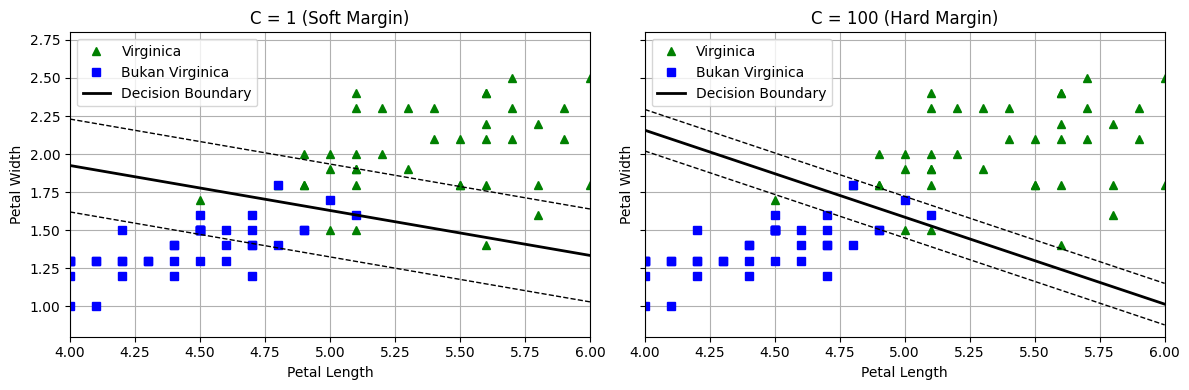

In [15]:
import matplotlib.pyplot as plt

# Fungsi plotting decision boundary SVM linear
def plot_boundary_svm(model, X, y, ax, title):
    ax.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Virginica")
    ax.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Bukan Virginica")

    # Ambil parameter
    w = model.coef_[0]
    b = model.intercept_[0]

    x_vals = np.linspace(4, 6, 100)
    y_vals = -(w[0]/w[1]) * x_vals - b/w[1]
    margin = 1 / np.linalg.norm(w)
    y_upper = y_vals + margin
    y_lower = y_vals - margin

    ax.plot(x_vals, y_vals, "k-", linewidth=2, label="Decision Boundary")
    ax.plot(x_vals, y_upper, "k--", linewidth=1)
    ax.plot(x_vals, y_lower, "k--", linewidth=1)

    ax.set_xlabel("Petal Length")
    ax.set_ylabel("Petal Width")
    ax.set_title(title)
    ax.legend()
    ax.axis([4, 6, 0.8, 2.8])
    ax.grid(True)

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
plot_boundary_svm(clf_soft, X, y, ax1, "C = 1 (Soft Margin)")
plot_boundary_svm(clf_hard, X, y, ax2, "C = 100 (Hard Margin)")
plt.tight_layout()
plt.show()


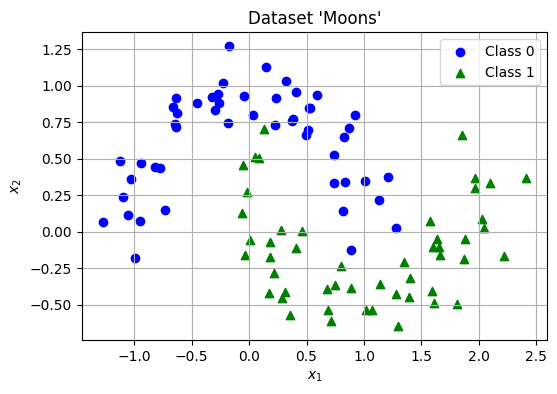

In [16]:
from sklearn.datasets import make_moons

# Dataset bulan sabit
X_moons, y_moons = make_moons(n_samples=100, noise=0.15, random_state=42)

# Visualisasi
plt.figure(figsize=(6, 4))
plt.scatter(X_moons[y_moons == 0][:, 0], X_moons[y_moons == 0][:, 1], c='blue', label='Class 0', marker='o')
plt.scatter(X_moons[y_moons == 1][:, 0], X_moons[y_moons == 1][:, 1], c='green', label='Class 1', marker='^')
plt.title("Dataset 'Moons'")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.grid(True)
plt.show()


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDClassifier

# Pipeline: polynomial mapping → standard scaling → linear SVM
poly_svm_pipeline = Pipeline([
    ("poly", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42, max_iter=5000))
])

# Latih model
poly_svm_pipeline.fit(X_moons, y_moons)


Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf',
                 LinearSVC(C=10, loss='hinge', max_iter=5000,
                           random_state=42))])

<Figure size 600x500 with 0 Axes>

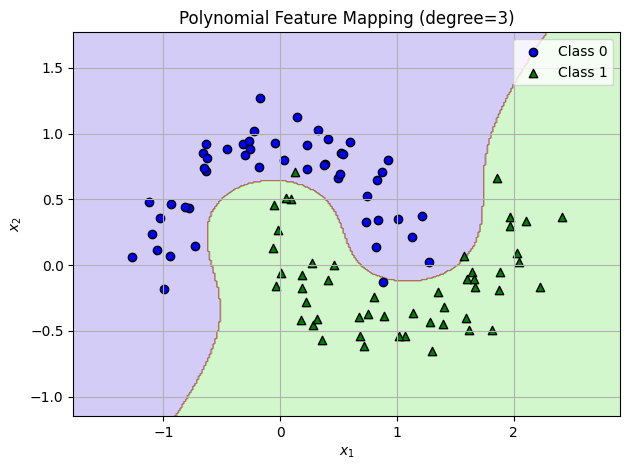

In [20]:
# Fungsi untuk menampilkan decision boundary
def plot_decision_boundary(model, X, y, ax=None, title=""):
    if ax is None:
        fig, ax = plt.subplots()

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    # Flatten dan prediksi untuk semua titik grid
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    zz = model.predict(X_grid).reshape(xx.shape)

    # Plot contour dan data asli
    ax.contourf(xx, yy, zz, cmap=plt.cm.brg, alpha=0.2)
    ax.scatter(X[:, 0][y == 0], X[:, 1][y == 0], c='blue', label="Class 0", edgecolors='k')
    ax.scatter(X[:, 0][y == 1], X[:, 1][y == 1], c='green', label="Class 1", edgecolors='k', marker='^')
    ax.set_title(title)
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.grid(True)
    ax.legend()

# Plot hasil klasifikasi
plt.figure(figsize=(6, 5))
plot_decision_boundary(poly_svm_pipeline, X_moons, y_moons, title="Polynomial Feature Mapping (degree=3)")
plt.tight_layout()
plt.show()


In [22]:
from sklearn.svm import SVC

# SVC dengan kernel polinomial
svc_poly = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

# Latih model
svc_poly.fit(X_moons, y_moons)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(C=5, coef0=1, kernel='poly'))])

<Figure size 600x500 with 0 Axes>

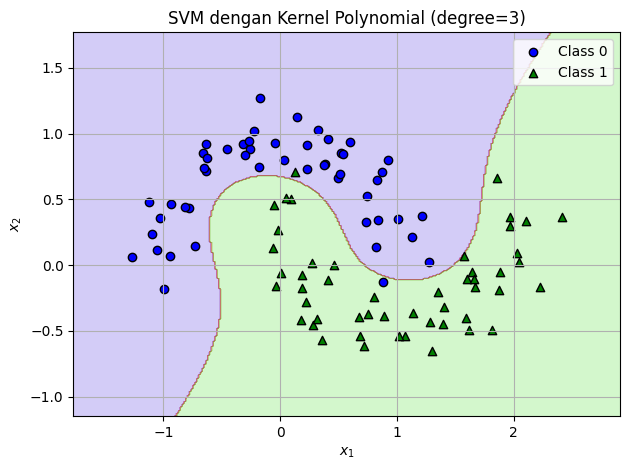

In [23]:
# Visualisasi decision boundary dari SVC dengan polynomial kernel
plt.figure(figsize=(6, 5))
plot_decision_boundary(svc_poly, X_moons, y_moons, title="SVM dengan Kernel Polynomial (degree=3)")
plt.tight_layout()
plt.show()


In [24]:
# SVC dengan kernel RBF (default kernel SVC)
svc_rbf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", gamma=0.5, C=5))
])

# Latih model
svc_rbf.fit(X_moons, y_moons)


Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(C=5, gamma=0.5))])

<Figure size 600x500 with 0 Axes>

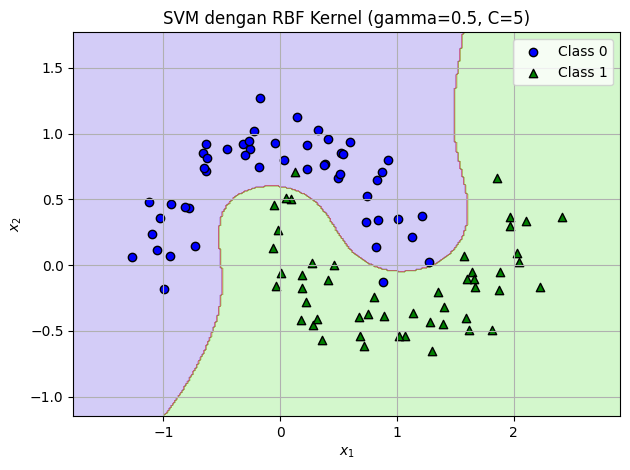

In [25]:
# Tampilkan decision boundary hasil SVM RBF
plt.figure(figsize=(6, 5))
plot_decision_boundary(svc_rbf, X_moons, y_moons, title="SVM dengan RBF Kernel (gamma=0.5, C=5)")
plt.tight_layout()
plt.show()


In [26]:
from sklearn.model_selection import GridSearchCV

# Buat pipeline SVM
svm_rbf_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf"))
])

# Grid parameter untuk dicari
param_grid = {
    "svm__C": [0.1, 1, 10, 100],
    "svm__gamma": [0.01, 0.1, 0.5, 1]
}

# Setup GridSearchCV
grid_search = GridSearchCV(svm_rbf_pipeline, param_grid, cv=5, scoring="accuracy", verbose=1)


In [27]:
# Latih model dengan GridSearchCV
grid_search.fit(X_moons, y_moons)

# Tampilkan parameter terbaik dan skor terbaik
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'svm__C': 10, 'svm__gamma': 0.5}
Best cross-validation accuracy: 0.97


<Figure size 600x500 with 0 Axes>

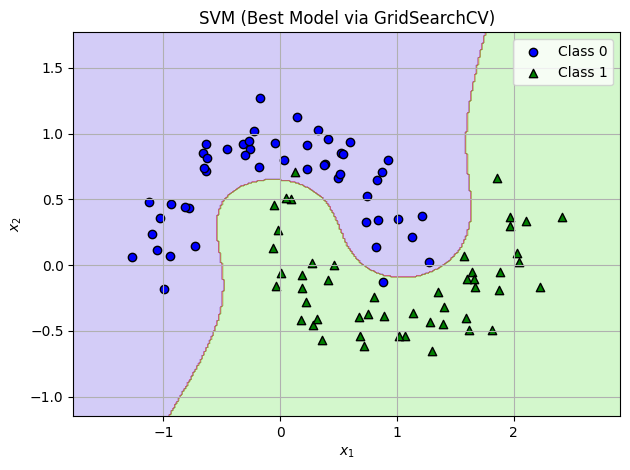

In [28]:
# Ambil model terbaik dari GridSearchCV
best_svm_model = grid_search.best_estimator_

# Visualisasi
plt.figure(figsize=(6, 5))
plot_decision_boundary(best_svm_model, X_moons, y_moons, title="SVM (Best Model via GridSearchCV)")
plt.tight_layout()
plt.show()


1. Analisis Detail: Cara Kerja Kode Model SVM (Untuk Google Colab)

Analisis ini menjelaskan secara mendalam bagaimana setiap bagian kode SVM di notebook bekerja, serta peran dari hiperparameter kunci.
A. Klasifikasi SVM Linier (Hard dan Soft Margin)

Model yang Digunakan: sklearn.svm.LinearSVC

    Tujuan: Kode ini bertujuan untuk menemukan garis pemisah (hyperplane) terlebar (margin maksimum) antara dua kelas.

    Hard Margin (Tidak Ideal): Model awal (jika data terpisah sempurna) mencari margin tanpa toleransi kesalahan. Ini rentan overfitting jika data memiliki noise.

    Soft Margin (Praktis): Diimplementasikan melalui hiperparameter C.

        Peran C: Mengontrol keseimbangan antara margin yang lebar dan pelanggaran margin (margin violations).

            C kecil: Memprioritaskan margin yang lebih lebar (regularisasi kuat), mengizinkan lebih banyak pelanggaran data latih (lebih sedikit overfitting).

            C besar: Memprioritaskan klasifikasi yang benar pada setiap titik data (margin sempit), sangat rentan terhadap outliers.

        Cara Kerja Kode: Anda menggunakan LinearSVC dengan scaling data (StandardScaler) untuk memastikan semua fitur berada pada skala yang sama, yang krusial bagi kinerja SVM.

B. Klasifikasi SVM Non-Linier (Kernel Trick)

Model yang Digunakan: sklearn.svm.SVC

    Tujuan: Menyelesaikan masalah klasifikasi pada data yang tidak dapat dipisahkan secara linier (misalnya, dataset make_moons yang berbentuk bulan sabit).

    Kernel Trick: Inti dari solusi non-linier. Daripada secara eksplisit memetakan data ke ruang dimensi yang lebih tinggi (yang mahal secara komputasi), SVM menggunakan fungsi kernel untuk menghitung kesamaan antara pasangan titik data di ruang dimensi tinggi secara implisit.

    Kernel RBF (Radial Basis Function / Gaussian): Kernel yang paling populer.

        Hiperparameter gamma (γ): Mengontrol "radius" pengaruh sebuah support vector.

            γ besar: Radius kecil. Setiap instans memiliki pengaruh lokal, menghasilkan batas keputusan yang sangat tidak teratur dan berisiko overfitting.

            γ kecil: Radius besar. Batas keputusan menjadi lebih halus dan lebih umum (regularisasi kuat).

        Kode Implementasi: Anda menggunakan SVC(kernel="rbf", gamma=5, C=0.001) dan memvisualisasikan bagaimana kombinasi γ dan C yang berbeda memengaruhi batas keputusan.

C. Regresi SVM (SVR)

Model yang Digunakan: LinearSVR dan SVR

    Perbedaan dengan Klasifikasi: Regresi SVM bertujuan untuk memasukkan sebanyak mungkin titik data ke dalam "margin jalan" (margin epsilon) sambil meminimalkan pelanggaran.

    Hiperparameter Penting: ϵ (epsilon)

        Peran ϵ: Menentukan lebar margin di mana tidak ada penalti biaya yang dikenakan pada titik data. Titik data yang berada di dalam margin ϵ tidak memengaruhi fungsi biaya model.

        Implikasi: ϵ yang lebih besar menghasilkan margin yang lebih lebar dan model yang lebih tergeneralisasi (lebih teratur).